### __author__ =  Wasiu Akanni

Because most of the datasets I have been working on contain human data, these can not be made public. The code presented below is meant to show my coding skills and knowledge of the most common data analysis methods used today. hence, some analysis was done to explore the data and some simply to showcase the methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load Data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Exploration
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.416380e+05  2.413600e+05        2.401560e+05  2.220090e+05   
mean   5.222457e+06  1.187444e+04        1.192252e+04  7.939517e+04   
std    3.216461e+07  8.244282e+04        8.015017e+04  4.047827e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    5.616250e+03  0.000000e+00        4.571000e+00  1.230000e+02   
50%    6.140300e+04  3.900000e+01        7.900000e+01  1.347000e+03   
75%    6.335375e+05  8.350000e+02        1.016714e+03  1.090500e+04   
max    6.721704e+08  4.082890e+06        3.436560e+06  6.848506e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  221911.000000        220725.000000            240540.000000   
mean      128.224212           128.775367             72509.868191   
std       740.908687           686.794120            122879.533021   
min         0.000000             0.000000                 0.001000   
25%       

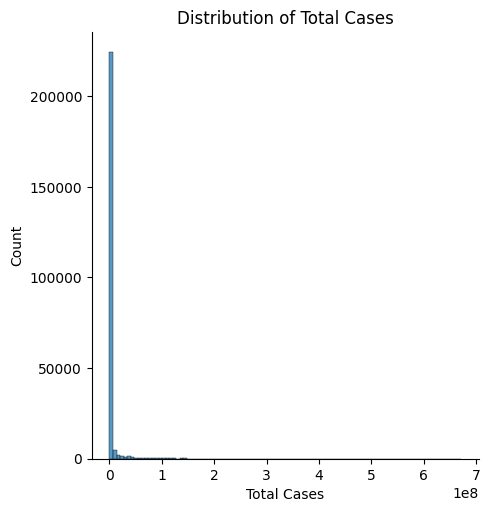

In [4]:
# Plot Distribution of Total Cases
sns.displot(df['total_cases'], bins=100)
plt.title("Distribution of Total Cases")
plt.xlabel("Total Cases")
plt.show()

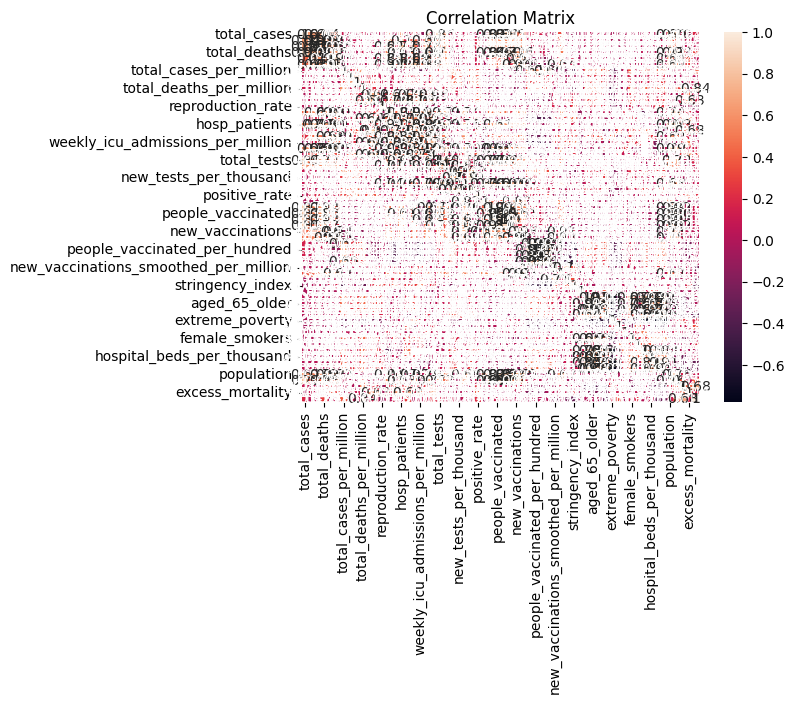

In [5]:
# Plot Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Transformation
df['log_cases'] = np.log(df['total_cases']) # create a log transformation of total cases column
df = pd.get_dummies(df, columns=['location']) 


In [7]:
# Analysis
y = df['total_cases']
X = df.drop(['total_cases','iso_code','iso_code','continent','date','tests_units'], axis=1)

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X_imputed = imputer.transform(X)
y_filled = y.fillna(y.mean())

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_filled, test_size=0.2, random_state=42)


In [10]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
 # Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train R^2: ", r2_score(y_train, y_train_pred))
print("Test R^2: ", r2_score(y_test, y_test_pred))
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))

Train R^2:  0.9572353101960586
Test R^2:  0.9578878329163849
Train MSE:  41705769596085.83
Test MSE:  41290167170816.9


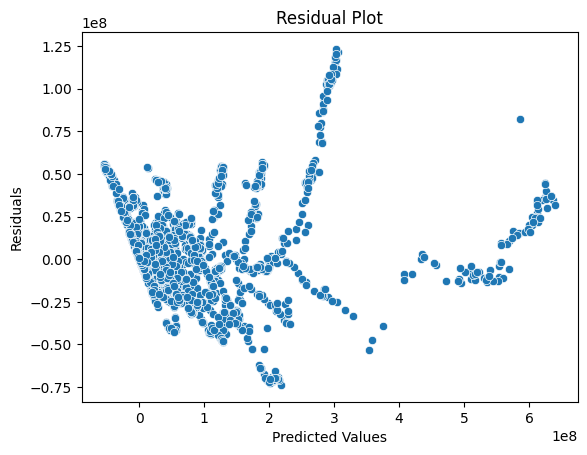

In [12]:
# Residual Plot
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals)
plt.hlines(y=0, xmin=0, xmax=50, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

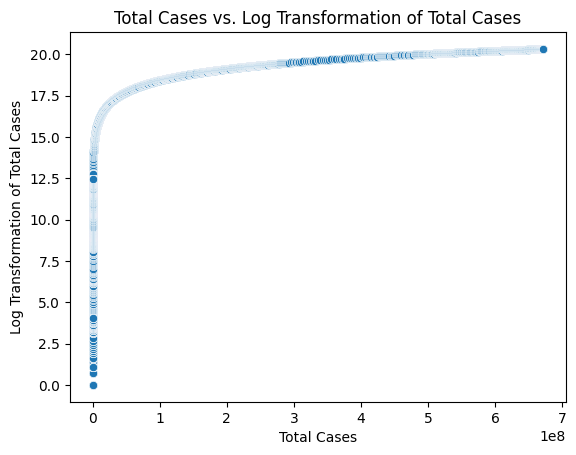

In [13]:
#Plot Total Cases vs. log_cases
sns.scatterplot(x=df['total_cases'], y=df['log_cases'])
plt.title("Total Cases vs. Log Transformation of Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Log Transformation of Total Cases")
plt.show()

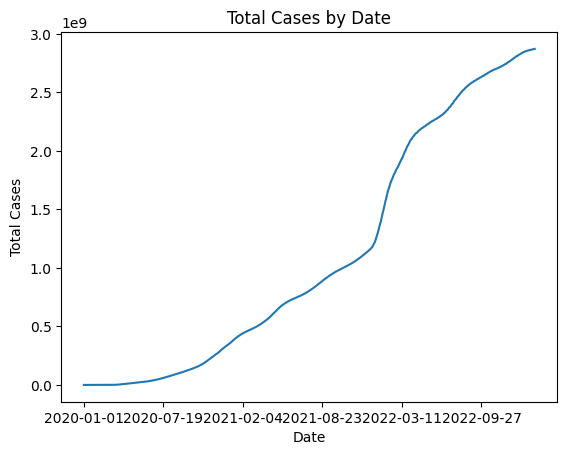

In [14]:
#Plot Total Cases by Date
df.groupby('date')['total_cases'].sum().plot()
plt.title("Total Cases by Date")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

In [15]:
pd.set_option('display.max_columns', None)
#df.head(5)

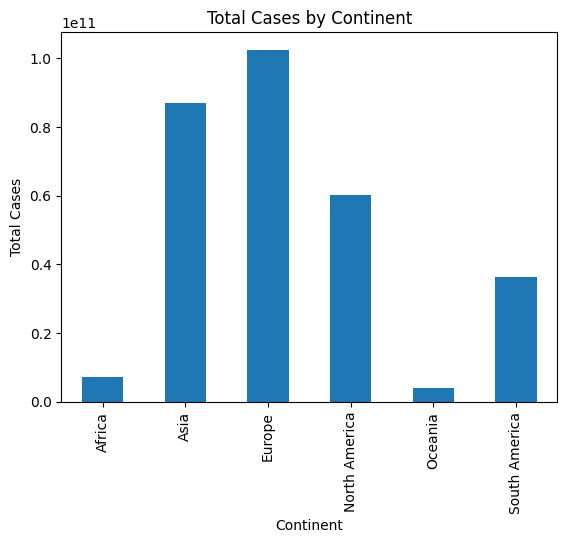

In [16]:
#Plot Total Cases by Continent
df.groupby('continent')['total_cases'].sum().plot(kind='bar')
plt.title("Total Cases by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Cases")
plt.show()


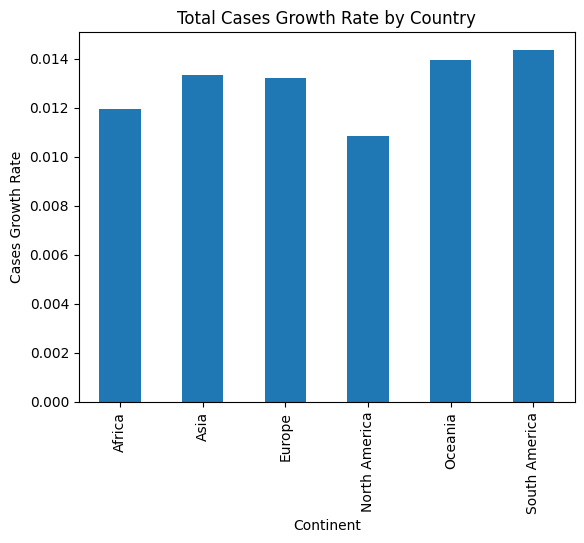

In [17]:
#Plot Total Cases Growth Rate by Continent
df['cases_growth_rate'] = df.groupby('continent')['total_cases'].pct_change()
df.groupby('continent')['cases_growth_rate'].mean().plot(kind='bar')
plt.title("Total Cases Growth Rate by Country")
plt.xlabel("Continent")
plt.ylabel("Cases Growth Rate")
plt.show()

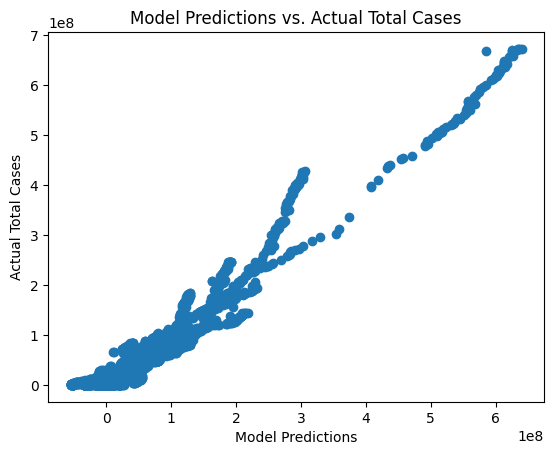

In [18]:
#Model Predictions vs. Actual Total Cases
plt.scatter(y_test_pred, y_test)
plt.xlabel("Model Predictions")
plt.ylabel("Actual Total Cases")
plt.title("Model Predictions vs. Actual Total Cases")
plt.show()

In [19]:
#Model Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score: ", r2_score(y_test, y_test_pred))

Mean Absolute Error:  2293273.860077405
Mean Squared Error:  41290167170816.9
Root Mean Squared Error:  6425742.538478872
R2 Score:  0.9578878329163849


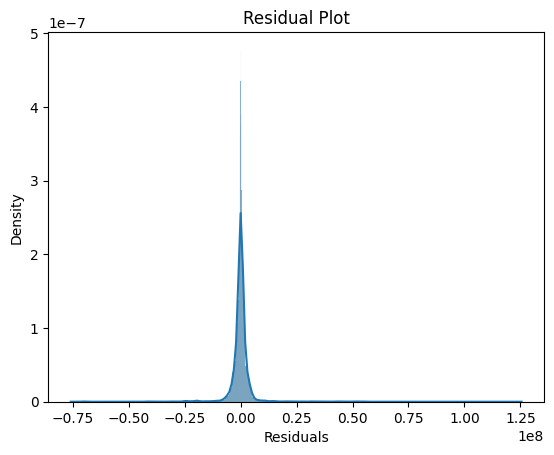

In [20]:
#Plot Residuals
sns.histplot(
    (y_test - y_test_pred), kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.show()

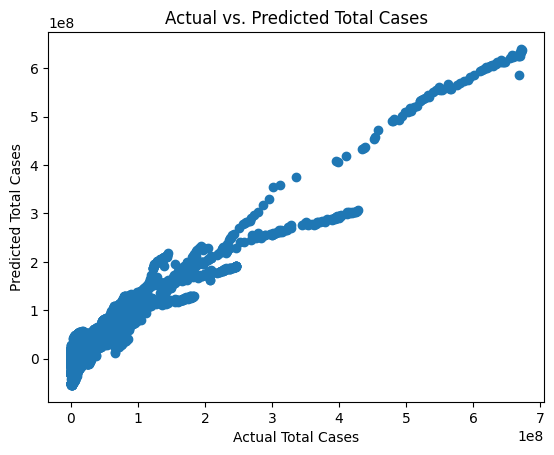

In [21]:
#Plot Actual vs. Predicted Total Cases
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Total Cases")
plt.ylabel("Predicted Total Cases")
plt.title("Actual vs. Predicted Total Cases")
plt.show()


In [22]:
# Create a linear regression model
lm = LinearRegression()

In [23]:
#Model Performance on Entire Data
y_all = df['total_cases']
X_all = df.drop(['date','log_cases','total_cases','iso_code','iso_code','continent','date','tests_units'], axis=1)
X_all = X_all[X_all.columns.drop(list(df.filter(regex='location')))]
#X_all.head()

X_all_filled = X_all.fillna(X_all.mean())
y_all_filled = y_all.fillna(y_all.mean())

scaler = StandardScaler()
X_all_filled = scaler.fit_transform(pd.get_dummies(X_all_filled))

#Fit the Model on Entire Data
lm.fit(X_all_filled, y_all_filled)

#Predict Total Cases on Entire Data
y_all_pred = lm.predict(X_all_filled)

In [24]:
#Model Evaluation Metrics on Entire Data
print("Mean Absolute Error on Entire Data: ", mean_absolute_error(y_all_filled, y_all_pred))
print("Mean Squared Error on Entire Data: ", mean_squared_error(y_all_filled, y_all_pred))
print("Root Mean Squared Error on Entire Data: ", np.sqrt(mean_squared_error(y_all_filled, y_all_pred)))
print("R2 Score on Entire Data: ", r2_score(y_all_filled, y_all_pred))


Mean Absolute Error on Entire Data:  2561804.4920749012
Mean Squared Error on Entire Data:  62497671227131.664
Root Mean Squared Error on Entire Data:  7905546.864520611
R2 Score on Entire Data:  0.9359844186458603


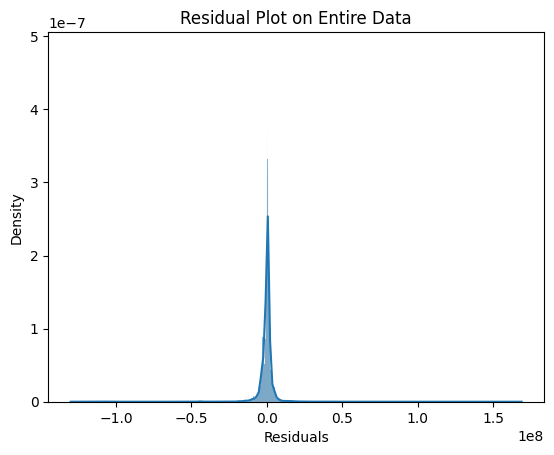

In [25]:
#Plot Residuals on Entire Data

sns.histplot(
    (y_all_filled - y_all_pred), kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title("Residual Plot on Entire Data")
plt.xlabel("Residuals")
plt.show()

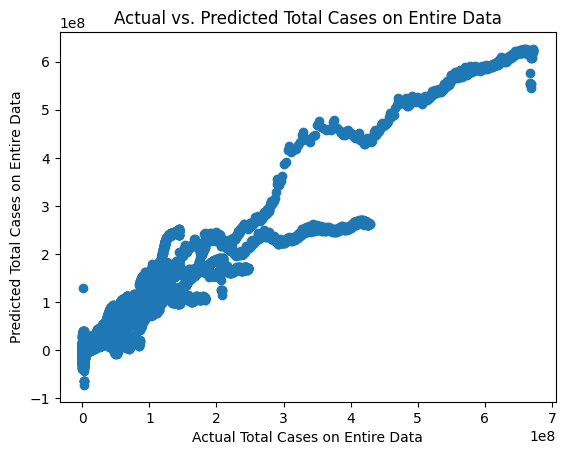

In [26]:
#Plot Actual vs. Predicted Total Cases on Entire Data
plt.scatter(y_all_filled, y_all_pred)
plt.xlabel("Actual Total Cases on Entire Data")
plt.ylabel("Predicted Total Cases on Entire Data")
plt.title("Actual vs. Predicted Total Cases on Entire Data")
plt.show()

In [27]:
# Predictive Modeling
# Divide the dataset into predictors and target
scaler = StandardScaler()
nume_df = df.drop(['date','log_cases','iso_code','iso_code','continent','tests_units'], axis=1)

#StandardScaler() to return a dataframe
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(nume_df.columns, scaler)])
scaled_features = mapper.fit_transform(nume_df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=nume_df.index, columns=nume_df.columns)
#scaled_features_df.head(5)


X = scaled_features_df.drop(['total_cases', 'new_cases'], axis=1)
y = scaled_features_df[['total_cases', 'new_cases']]


imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X)
X_imputed = imputer.transform(X)
imputer = imputer.fit(y)
y_imputed = imputer.transform(y)


In [28]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.3, random_state=0)

#Create a linear regression model
lm = LinearRegression()

#Fit the model to the training data
lm.fit(X_train, y_train)

#Predict on the test data
y_pred = lm.predict(X_test)

#Evaluate the model
print("Linear Regression Model R-squared: ", lm.score(X_test, y_test))


Linear Regression Model R-squared:  0.9519099365934911


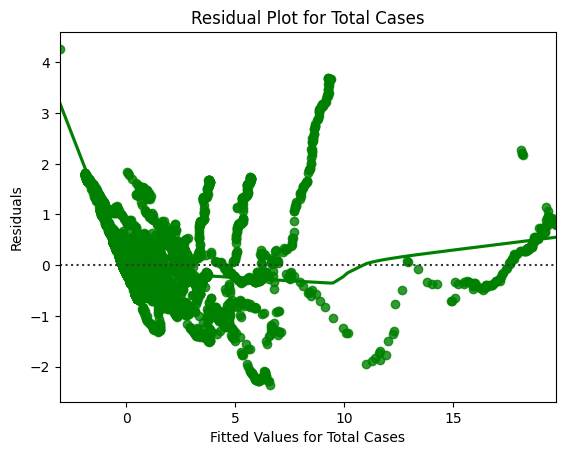

In [29]:
#Plot the residuals to check for homoscedasticity
sns.residplot(x=y_pred[:, 0], y=y_test[:, 0], lowess=True, color="g")
plt.xlabel("Fitted Values for Total Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for Total Cases")
plt.show()

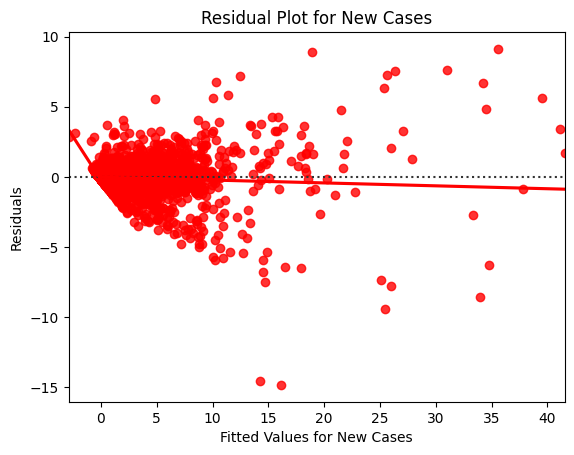

In [30]:
sns.residplot(x=y_pred[:, 1], y=y_test[:, 1], lowess=True, color="r")
plt.xlabel("Fitted Values for New Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for New Cases")
plt.show()

In [31]:
# Create a decision tree model
dt = DecisionTreeRegressor()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Model R-squared: ", dt.score(X_test, y_test))

Decision Tree Model R-squared:  0.9932635623849257


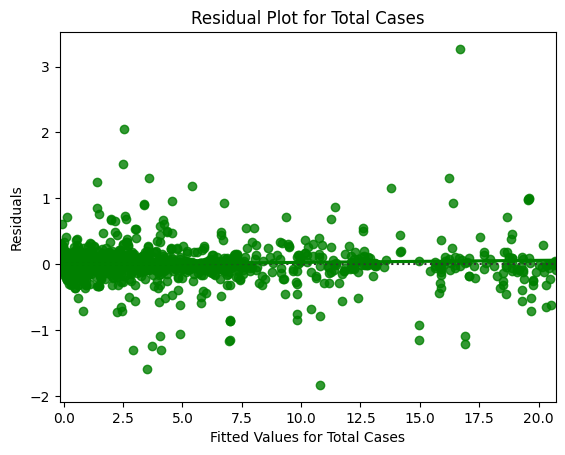

In [32]:
# Plot the residuals to check for homoscedasticity
sns.residplot(x=y_pred[:, 0], y=y_test[:, 0], lowess=True, color="g")
plt.xlabel("Fitted Values for Total Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for Total Cases")
plt.show()

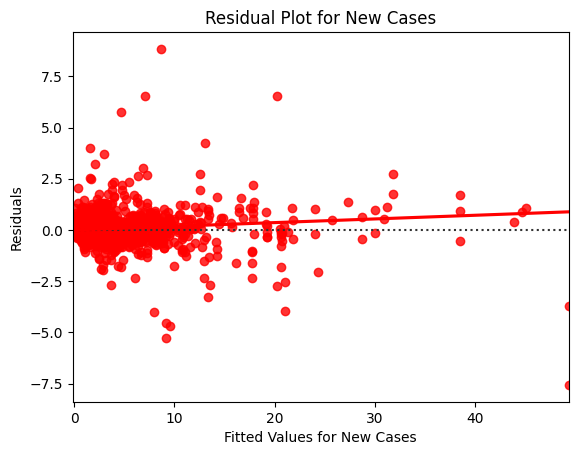

In [33]:
sns.residplot(x=y_pred[:, 1], y=y_test[:, 1], lowess=True, color="r")
plt.xlabel("Fitted Values for New Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for New Cases")
plt.show()

In [34]:
# Create a random forest model
rf = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Model R-squared: ", rf.score(X_test, y_test))

Random Forest Model R-squared:  0.9964347062013423


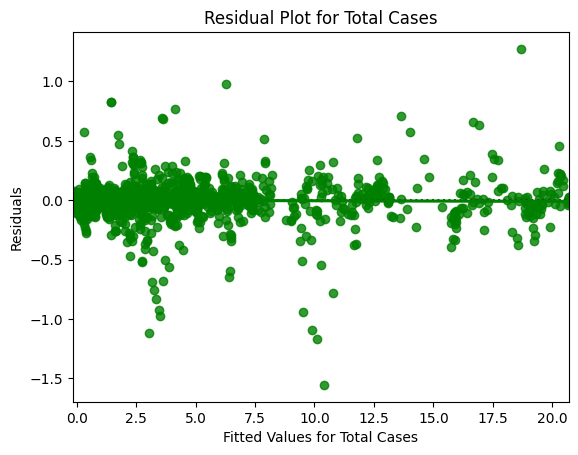

In [35]:
# Plot the residuals to check for homoscedasticity
sns.residplot(x=y_pred[:, 0], y=y_test[:, 0], lowess=True, color="g")
plt.xlabel("Fitted Values for Total Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for Total Cases")
plt.show()

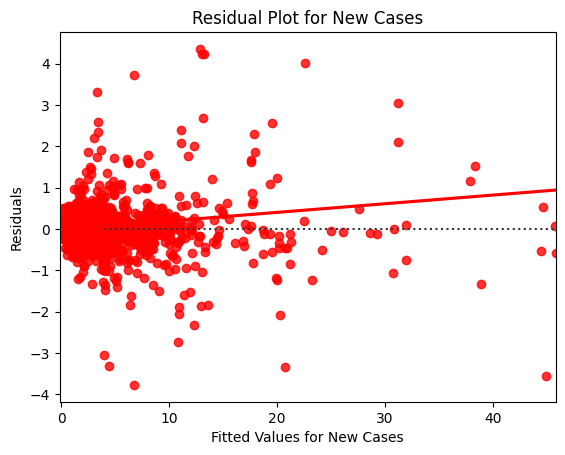

In [36]:
sns.residplot(x=y_pred[:, 1], y=y_test[:, 1], lowess=True, color="r")
plt.xlabel("Fitted Values for New Cases")
plt.ylabel("Residuals")
plt.title("Residual Plot for New Cases")
plt.show()